### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'],axis =1)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts =application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

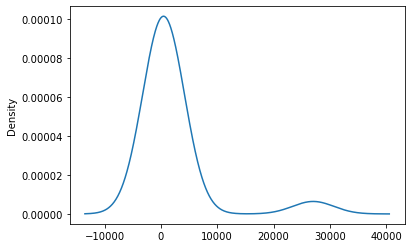

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts<100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

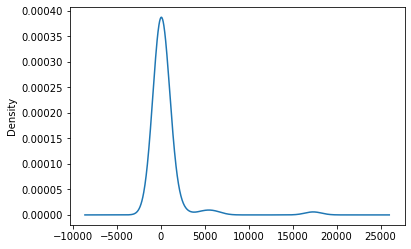

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts<500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Counting total values for the ASK_AMT column
application_df['ASK_AMT'].count()

34299

In [11]:
# Look at ASK_AMT value counts for binning
amounts_counts = application_df['ASK_AMT'].value_counts()
amounts_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [12]:
# Evaluate the ASK_AMT column value counts for binning
application_df['ASK_AMT'][application_df['ASK_AMT']>5000].count()

8901

In [13]:
# Evaluate the ASK_AMT column value counts for binning
application_df['ASK_AMT'][application_df['ASK_AMT']>100000].count()

4531

<AxesSubplot:ylabel='Density'>

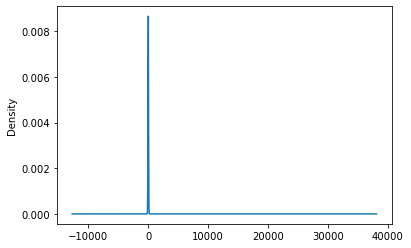

In [14]:
# Visualize the value counts of ASK_AMT 
amounts_counts.plot.density()

In [15]:
 # Gather index information?
replace_amount = list(amounts_counts.index)

# # Replace in dataframe
for cls in replace_amount:

    if cls>100000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"greater than 100k")
    elif cls <= 100000 and cls > 5000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"5001 to 100k")
    else:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(cls,"5k")

# # Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

5k                   25398
greater than 100k     4531
5001 to 100k          4370
Name: ASK_AMT, dtype: int64

In [16]:
# Look at NAME value counts for binning
name_counts =application_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [17]:
# How many NAMEs only have one loan
(name_counts[name_counts==1]).count()

18776

<AxesSubplot:ylabel='Density'>

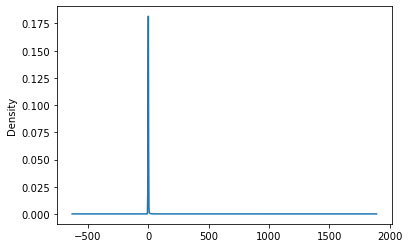

In [18]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [19]:
# Determine which values to replace if counts are less than ..?
replace_name1 = list(name_counts[name_counts==1].index)
replace_name2 = list(name_counts[(name_counts>1)&(name_counts<51)].index)
replace_name3 = list(name_counts[(name_counts>50)&(name_counts<101)].index)
replace_name4 = list(name_counts[(name_counts>100)&(name_counts<151)].index)
replace_name5 = list(name_counts[(name_counts>150)&(name_counts<201)].index)
replace_name6 = list(name_counts[(name_counts>200)&(name_counts<251)].index)
replace_name7 = list(name_counts[(name_counts>250)&(name_counts<301)].index)
replace_name8 = list(name_counts[(name_counts>300)&(name_counts<401)].index)


# Replace in dataframe
for cls1 in replace_name1:
    application_df.NAME = application_df.NAME.replace(cls1,"Received 1 grant")

# Replace in dataframe
for cls2 in replace_name2:
    application_df.NAME = application_df.NAME.replace(cls2,"Between 2 and 50 grants")

# Replace in dataframe
for cls3 in replace_name3:
    application_df.NAME = application_df.NAME.replace(cls3,"Between 51 and 100 grants")
    
# Replace in dataframe
for cls4 in replace_name4:
    application_df.NAME = application_df.NAME.replace(cls4,"Between 101 and 150 grants")
    
# Replace in dataframe
for cls5 in replace_name5:
    application_df.NAME = application_df.NAME.replace(cls5,"Between 151 and 200 grants")

for cls6 in replace_name6:
    application_df.NAME = application_df.NAME.replace(cls6,"Between 201 and 250 grants")
    
for cls7 in replace_name7:
    application_df.NAME = application_df.NAME.replace(cls7,"Between 251 and 300 grants")
    
for cls8 in replace_name8:
    application_df.NAME = application_df.NAME.replace(cls8,"Between 301 and 400 grants")
    
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Received 1 grant                                   18776
Between 2 and 50 grants                             5869
Between 51 and 100 grants                           1342
Between 101 and 150 grants                          1310
PARENT BOOSTER USA INC                              1260
Between 251 and 300 grants                          1123
Between 301 and 400 grants                          1012
Between 151 and 200 grants                           826
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
Between 201 and 250 grants                           416
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
Name: NAME, dtype: int64

In [20]:
application_df.nunique()

NAME                      13
APPLICATION_TYPE          10
AFFILIATION                6
CLASSIFICATION             7
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT                    3
IS_SUCCESSFUL              2
dtype: int64

In [21]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [22]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Between 101 and 150 grants,NAME_Between 151 and 200 grants,NAME_Between 2 and 50 grants,NAME_Between 201 and 250 grants,NAME_Between 251 and 300 grants,NAME_Between 301 and 400 grants,NAME_Between 51 and 100 grants,NAME_PARENT BOOSTER USA INC,NAME_Received 1 grant,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5001 to 100k,ASK_AMT_5k,ASK_AMT_greater than 100k
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\tamie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Between 101 and 150 grants,NAME_Between 151 and 200 grants,NAME_Between 2 and 50 grants,NAME_Between 201 and 250 grants,NAME_Between 251 and 300 grants,NAME_Between 301 and 400 grants,NAME_Between 51 and 100 grants,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5001 to 100k,ASK_AMT_5k,ASK_AMT_greater than 100k
0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
# # Encoded special considerations create duplicate columns, only one is needed

# application_df=application_df.drop("SPECIAL_CONSIDERATIONS_N",1)
# application_df

In [26]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\tamie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*(number_input_features)
hidden_nodes_layer2 = 1.5*(number_input_features)
hidden_nodes_layer3 = 0.75*(number_input_features)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               10980     
                                                                 
 dense_1 (Dense)             (None, 90)                16290     
                                                                 
 dense_2 (Dense)             (None, 45)                4095      
                                                                 
 dense_3 (Dense)             (None, 1)                 46        
                                                                 
Total params: 31,411
Trainable params: 31,411
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/optimized/",exist_ok=True)
checkpoint_path = "checkpoints/optimized/weights_optimized.{epoch:02d}.hdf5"

In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5198 - accuracy: 0.7437
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4933 - accuracy: 0.7588
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4865 - accuracy: 0.7619
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7626
Epoch 5/100
793/804 [============================>.] - ETA: 0s - loss: 0.4802 - accuracy: 0.7643
Epoch 5: saving model to checkpoints/optimized\weights_optimized.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4796 - accuracy: 0.7646
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.7665
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4746 - accuracy: 0.7675
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.7687
Epoch 9/100
804/804 [=============

804/804 [==============================] - 2s 2ms/step - loss: 0.4499 - accuracy: 0.7786
Epoch 63/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4497 - accuracy: 0.7786
Epoch 64/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4493 - accuracy: 0.7796
Epoch 65/100
791/804 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.7788
Epoch 65: saving model to checkpoints/optimized\weights_optimized.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4496 - accuracy: 0.7788
Epoch 66/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4497 - accuracy: 0.7797
Epoch 67/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.7806
Epoch 68/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4490 - accuracy: 0.7808
Epoch 69/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4489 - accuracy: 0.7799
Epoch 70/100
786/804 [================

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5090 - accuracy: 0.7601 - 420ms/epoch - 2ms/step
Loss: 0.5090333819389343, Accuracy: 0.7601166367530823


In [33]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

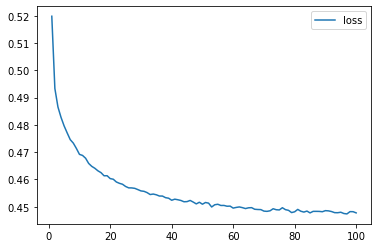

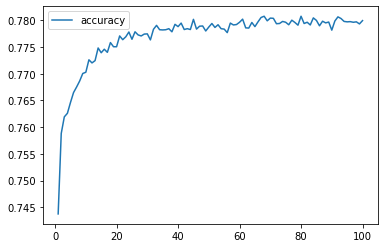

In [34]:
# Create a DF to see the loss & Accuracy
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")